### DB Scan Clustering

Problem Statement: Cluster the Following Universities Data

Dataset--> Universities.csv

In [1]:
#Loading the Required libraries
from sklearn.cluster import DBSCAN  # for DBScan
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the Dataset
Univ = pd.read_csv("C:/Users/Akaash/Downloads/Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


Inference: 

Standardization/Normalization of Value is required Because value are not on same Scale,as Euclidean Distance is influenced by different scale value

Also Dropping Univ Column as Object/string dtype is not required

#### Standardization Function

In [3]:
# Standardization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fillting the Standardize Value and Droping the 'Univ' column as it is categorial
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])
scaled_Univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

### Building the DBScan Algorithms

In [4]:
dbscan = DBSCAN(eps=2.5, min_samples=6)
dbscan.fit(scaled_Univ_df)

DBSCAN(eps=2.5, min_samples=6)

Inference:eps is the epsilon and min_samples is the min_pts parameter

In [5]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
       -1,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [6]:
#Creating a DataFrame of these Cluster Value
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl.head()

,cluster
0,0
1,-1
2,0
3,0
4,0


In [7]:
#Appending cl Dataframe to the original Dataset
final = pd.concat([Univ,cl],axis =1)
final

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,-1
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [8]:
#List of Outliers Datapoint
list(np.where(final.cluster==-1))

[array([ 1, 15, 17], dtype=int64)]

Inference: It gives the index of the Outliers Datapoints.

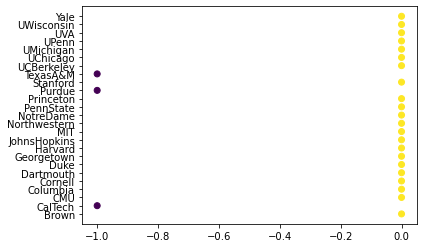

In [9]:
#Plot of Clusters
plt.figure(figsize = (6,4))
plt.scatter(final['cluster'],final['Univ'], c = dbscan.labels_)